#### ライブラリのインストール

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Googleドライブのマウント
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#### 基本ワークフロー

[Text(0.5, 1.0, 'Sample Plot'), Text(0.5, 0, 'x-axis'), Text(0, 0.5, 'y-axis')]

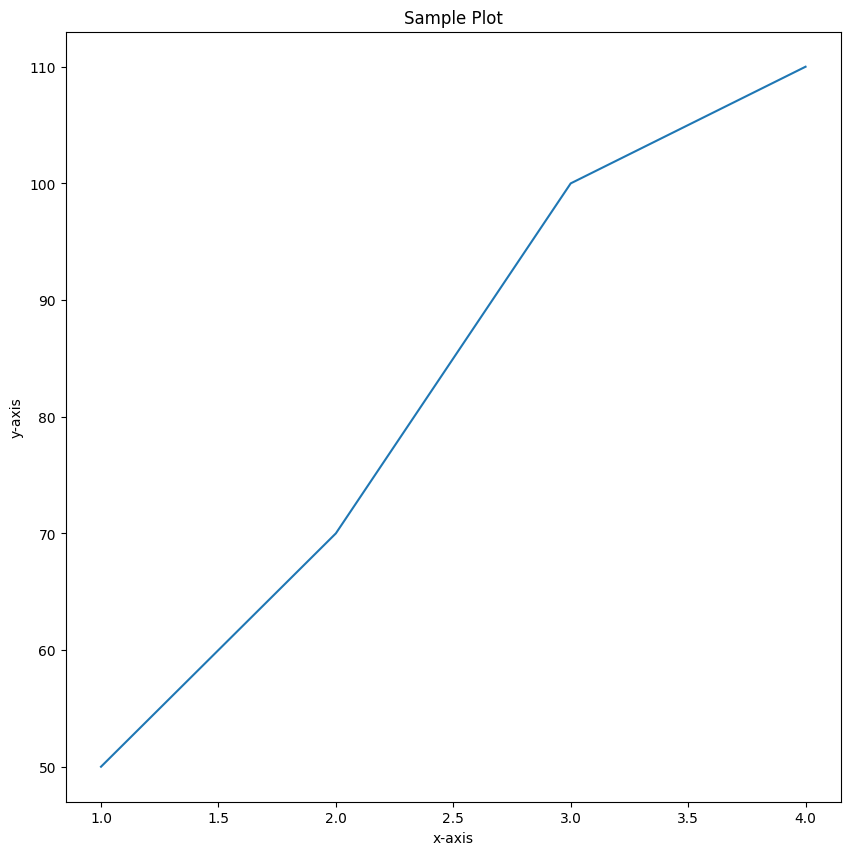

In [ ]:
# データの準備
x =[1, 2, 3, 4]
y = [50, 70, 100, 110]

# プロットのセットアップ
# plt.figure()：1つの図に1つのプロット
# plt.subplot()：1つの図に複数のプロット
fig, ax = plt.subplots(figsize=(10, 10))

# プロット
ax.plot(x, y)

# プロットのカスタマイズ
ax.set(title='Sample Plot', xlabel='x-axis', ylabel='y-axis')

# 保存
# fig.saveing("images/sample-plot.png")

#### 基本プロット

In [ ]:
# データの準備
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

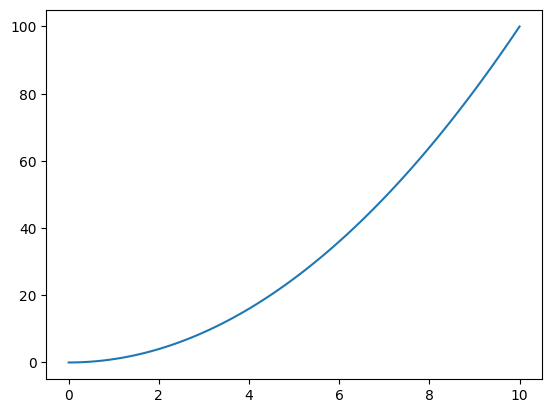

In [ ]:
# 線形プロット
fig, ax = plt.subplots()
ax.plot(x, x**2)

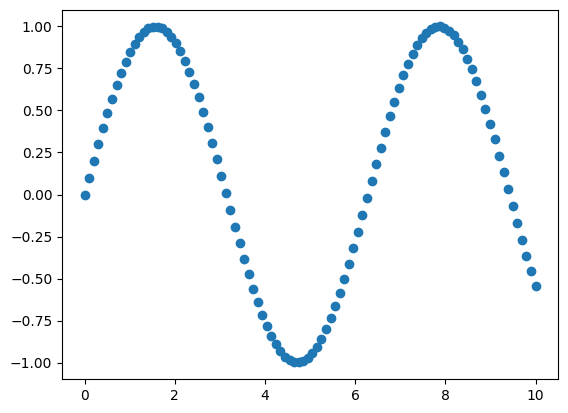

In [ ]:
# 散布図
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))

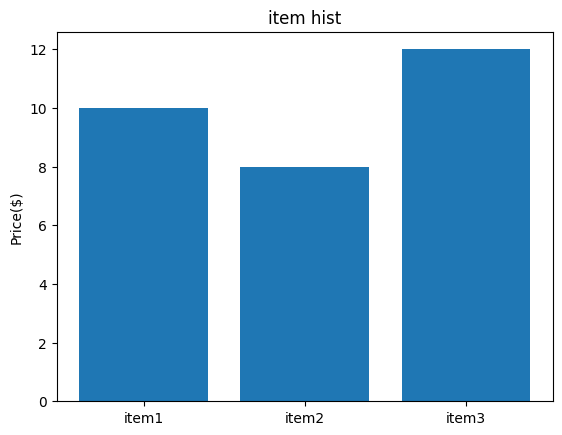

In [ ]:
# ヒストグラム
item_prices = {"item1": 10, "item2": 8, "item3": 12}
fig, ax = plt.subplots()
ax.bar(item_prices.keys(), item_prices.values());
ax.set(title="item hist",
       ylabel="Price($)");

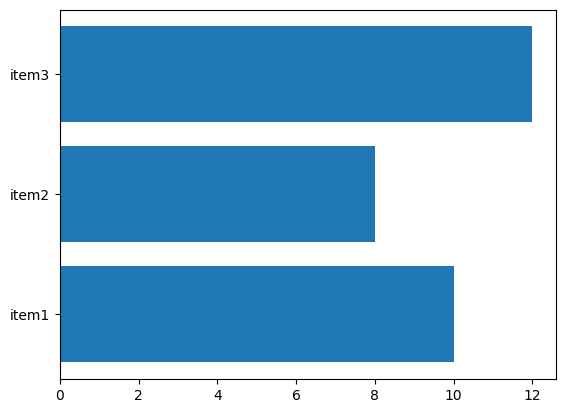

In [ ]:
# ヒストグラム（横）
fig, ax = plt.subplots()
ax.barh(list(item_prices.keys()), list(item_prices.values()));

(array([  5.,  42.,  88., 168., 251., 234., 131.,  60.,  14.,   7.]),
 array([-2.91598103, -2.3004574 , -1.68493377, -1.06941014, -0.45388651,
         0.16163712,  0.77716075,  1.39268437,  2.008208  ,  2.62373163,
         3.23925526]),
 <BarContainer object of 10 artists>)

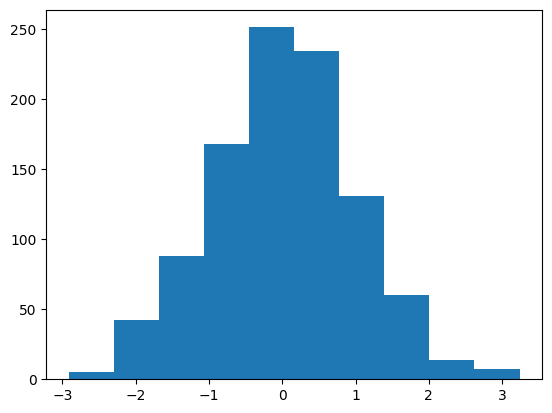

In [ ]:
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x)

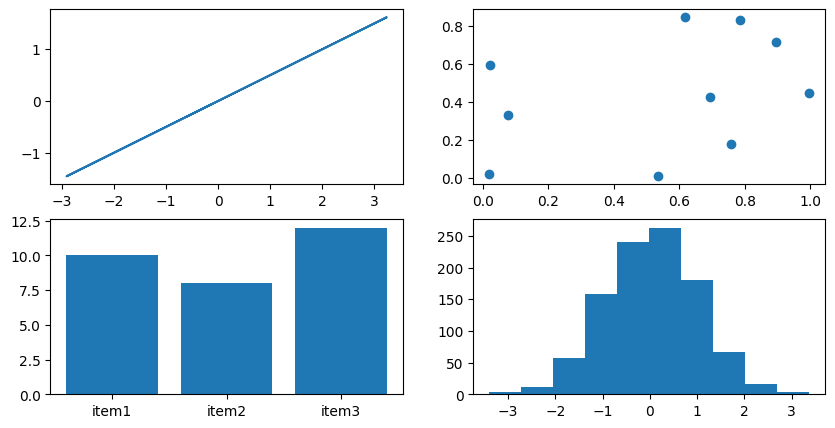

In [ ]:
# subplotの描画方法①
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(item_prices.keys(), item_prices.values());
ax4.hist(np.random.randn(1000));

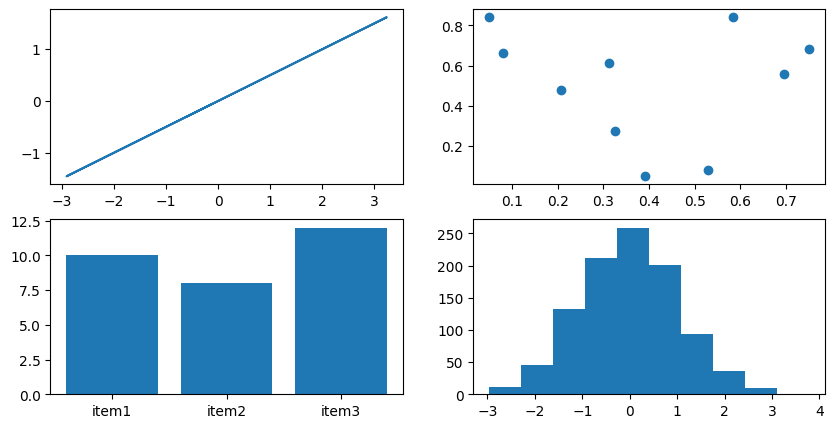

In [ ]:
# subplotの描画方法①
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].plot(x,x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(item_prices.keys(), item_prices.values());
ax[1, 1].hist(np.random.randn(1000));

#### Matplotlib API

In [ ]:
# 自動車の販売データの読み込み
car_sales = pd.read_csv("/content/drive/MyDrive/data-analysis/sample/car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


<Axes: >

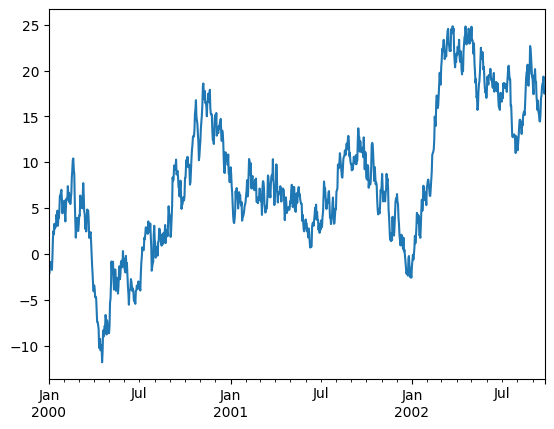

In [ ]:
# 線形プロット
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [ ]:
# オブジェクト型から数値型に変更（Priceの "$" の部分を変更）
car_sales['Price'] = car_sales['Price'].replace('[\$\,\.]', '', regex=True).astype(int)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000


In [ ]:
# strに戻して0を削除
car_sales["Price"] = car_sales["Price"].astype(str).str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [ ]:
# 変形したcar_sales列を整数型に変換
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [ ]:
# 「売上日」列の追加
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [ ]:
# 「総売上」列の追加
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


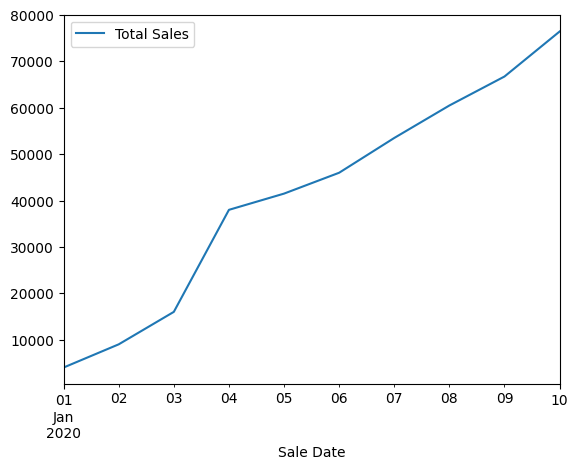

In [ ]:
# 線形プロット（総売上）
car_sales.plot(x="Sale Date", y="Total Sales", kind="line");

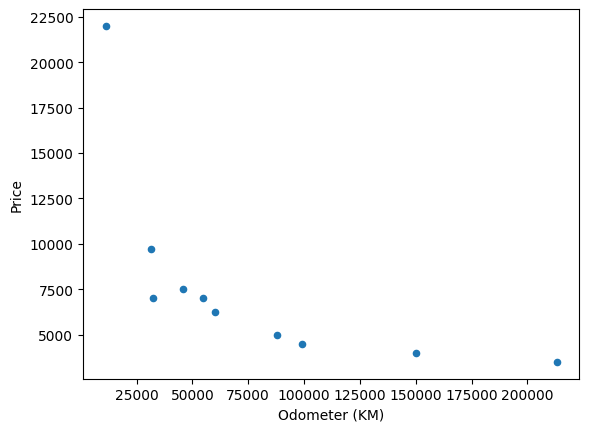

In [ ]:
# 散布図（走行距離×価格）
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

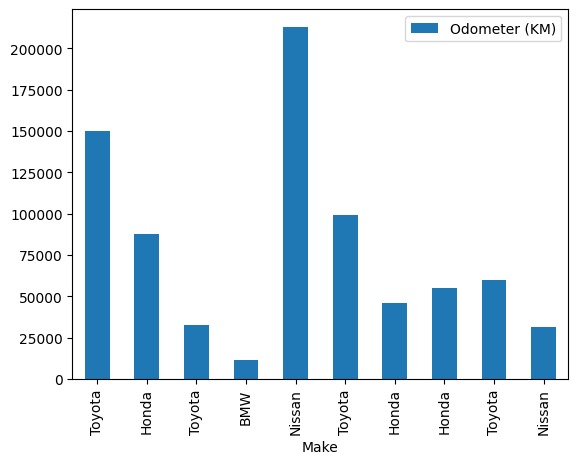

In [ ]:
# ヒストグラム（メーカー×走行距離）
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

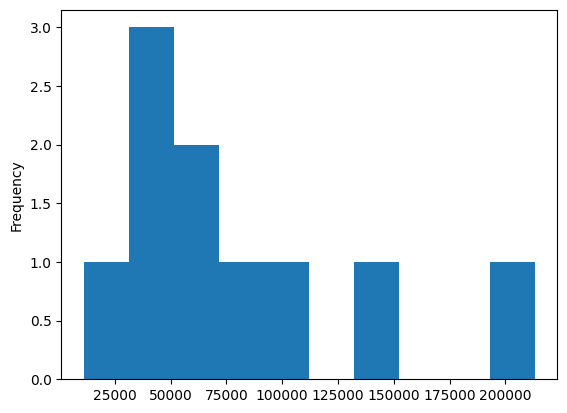

In [ ]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [ ]:
# 心臓病データの読み込み
heart_disease = pd.read_csv("/content/drive/MyDrive/data-analysis/sample/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


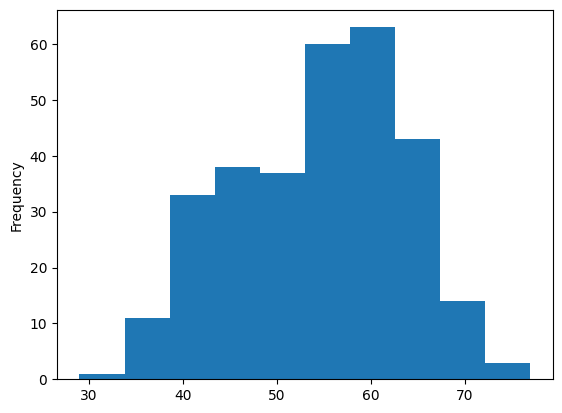

In [ ]:
# ヒストグラム（年齢）
heart_disease["age"].plot.hist(bins=10);

In [ ]:
# 50歳以上を抽出
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


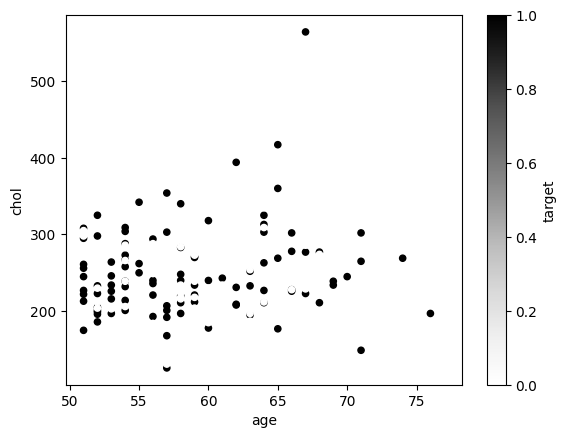

In [ ]:
# Pymethod
over_50.plot(kind="scatter", x="age", y="chol", c="target");

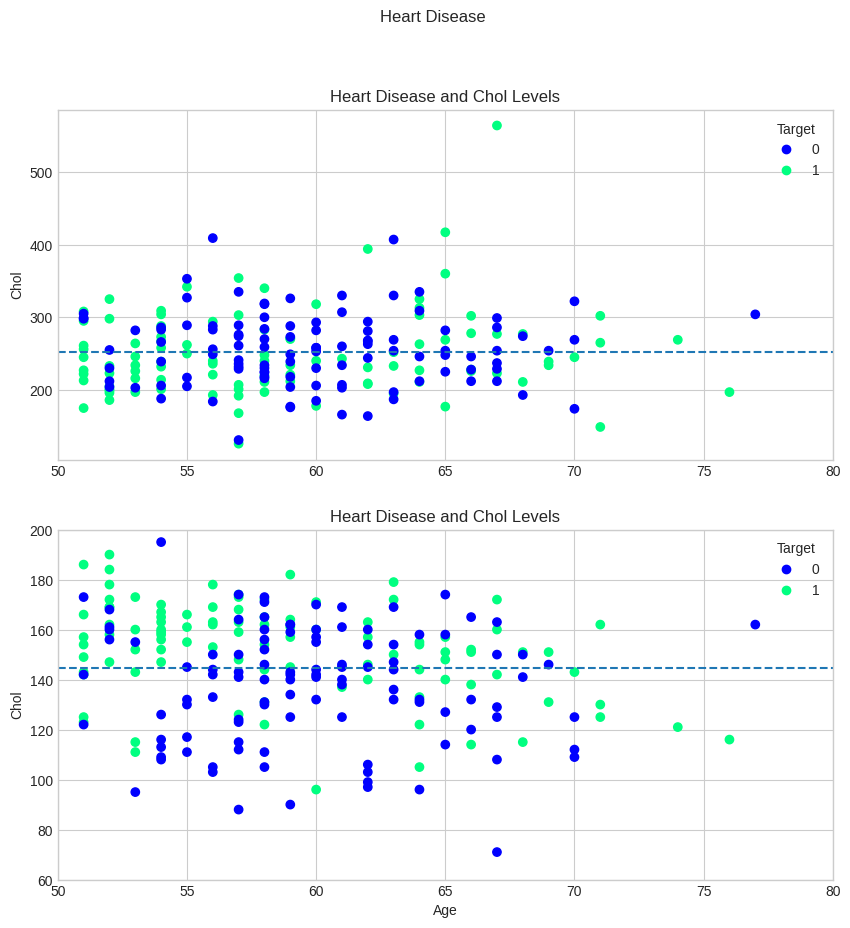

In [ ]:
# OO method (オブジェクト指向)

# スタイルの使用
plt.style.use("seaborn-v0_8-whitegrid")

# プロットする箱の用意
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# プロット（ax0）
scatter = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="winter")

# カスタマイズ（ax0）
ax0.set(title="Heart Disease and Chol Levels", ylabel="Chol");
ax0.set_xlim(50, 80)
ax0.legend(*scatter.legend_elements(), title="Target");
ax0.axhline(over_50["chol"].mean(), linestyle="--");

# プロット（ax1）
scatter = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"], cmap="winter")

# カスタマイズ（ax1）
ax1.set(title="Heart Disease and Chol Levels", xlabel="Age", ylabel="Chol");
ax1.set_xlim(50, 80)
ax1.set_ylim(60, 200)
ax1.legend(*scatter.legend_elements(), title="Target");
ax1.axhline(over_50["thalach"].mean(), linestyle="--");

# メインタイトルの追加
fig.suptitle("Heart Disease");

In [ ]:
# 変更可能なスタイル一覧
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']